In [2]:
import requests
import pandas as pd

In [3]:
url = "https://api.nasa.gov/neo/rest/v1/neo/browse/"
mi_key = {'api_key': 'wKbKyjoYVPtepB0YQ1hMCAsOGFD0bwAzcrqUElra'}
response = requests.get(url, params=mi_key)

In [4]:
dict_data = response.json()
data = dict_data['near_earth_objects']
df = pd.json_normalize(data)
df.head(3)

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,orbital_data.perihelion_distance,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_description,orbital_data.orbit_class.orbit_class_range
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.31,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,1.133284372081002,178.9269951795186,1.782973900121676,2459802.601698595905,110.7776526746434,.5597706088868498,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,1.194521858788897,156.2503681890173,4.079828796226027,2459956.023234763085,10.23596428095426,.2301418330768929,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.83,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,1.061321201278226,350.4750169387657,3.883609286075629,2460678.792844248905,188.0405622650862,.2535179888641312,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU


In [5]:
df.columns

Index(['id', 'neo_reference_id', 'name', 'name_limited', 'designation',
       'nasa_jpl_url', 'absolute_magnitude_h',
       'is_potentially_hazardous_asteroid', 'close_approach_data',
       'is_sentry_object', 'links.self',
       'estimated_diameter.kilometers.estimated_diameter_min',
       'estimated_diameter.kilometers.estimated_diameter_max',
       'estimated_diameter.meters.estimated_diameter_min',
       'estimated_diameter.meters.estimated_diameter_max',
       'estimated_diameter.miles.estimated_diameter_min',
       'estimated_diameter.miles.estimated_diameter_max',
       'estimated_diameter.feet.estimated_diameter_min',
       'estimated_diameter.feet.estimated_diameter_max',
       'orbital_data.orbit_id', 'orbital_data.orbit_determination_date',
       'orbital_data.first_observation_date',
       'orbital_data.last_observation_date', 'orbital_data.data_arc_in_days',
       'orbital_data.observations_used', 'orbital_data.orbit_uncertainty',
       'orbital_data.minimu

<AxesSubplot: >

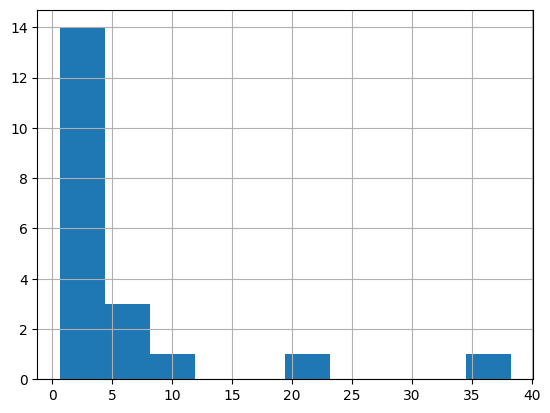

In [6]:
df['estimated_diameter.kilometers.estimated_diameter_min'].hist()

In [7]:
url = "https://api.nasa.gov/planetary/apod/"

mis_params = {
    'start_date':'2021-01-12',
    'end_date':'2021-02-12',
    'api_key': '4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'
}

r3 = requests.get(url, params = mis_params)
r3.status_code

200

In [8]:
dict_data = r3.json()
df = pd.json_normalize(dict_data)

In [9]:
df.head()

,copyright,date,explanation,hdurl,media_type,service_version,title,url
0,Rodrigo Guerra,2021-01-12,The night sky is filled with stories. Cultures...,https://apod.nasa.gov/apod/image/2101/OldMan_G...,image,v1,A Historic Brazilian Constellation,https://apod.nasa.gov/apod/image/2101/OldMan_G...
1,Giulio Cobianchi,2021-01-13,What are these two giant arches across the sky...,https://apod.nasa.gov/apod/image/2101/ArcticSk...,image,v1,Arches Across an Arctic Sky,https://apod.nasa.gov/apod/image/2101/ArcticSk...
2,NaN,2021-01-14,"Like salsa verde on your favorite burrito, a g...",https://apod.nasa.gov/apod/image/2101/aurora_i...,image,v1,Aurora Slathers Up the Sky,https://apod.nasa.gov/apod/image/2101/aurora_i...
3,NaN,2021-01-15,This shadowy landscape of majestic mountains a...,https://apod.nasa.gov/apod/image/2101/Pluto-Mo...,image,v1,A Plutonian Landscape,https://apod.nasa.gov/apod/image/2101/Pluto-Mo...
4,NaN,2021-01-16,This fantastic skyscape lies near the edge of ...,https://apod.nasa.gov/apod/image/2101/hs-2014-...,image,v1,The Mountains of NGC 2174,https://apod.nasa.gov/apod/image/2101/hs-2014-...


### Planetary Earth Imagery API
---

In [10]:
url = "https://api.nasa.gov/planetary/earth/imagery/"

mis_params = {
    'lon':'-101.706015655638',
    'lat':'21.15334114794275',
    'dim':'0.07',
    'date':'2019-02-01',
    'api_key': '4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'
}

r4 = requests.get(url, params = mis_params)
r4.status_code

200

In [11]:
from PIL import Image
from io import BytesIO

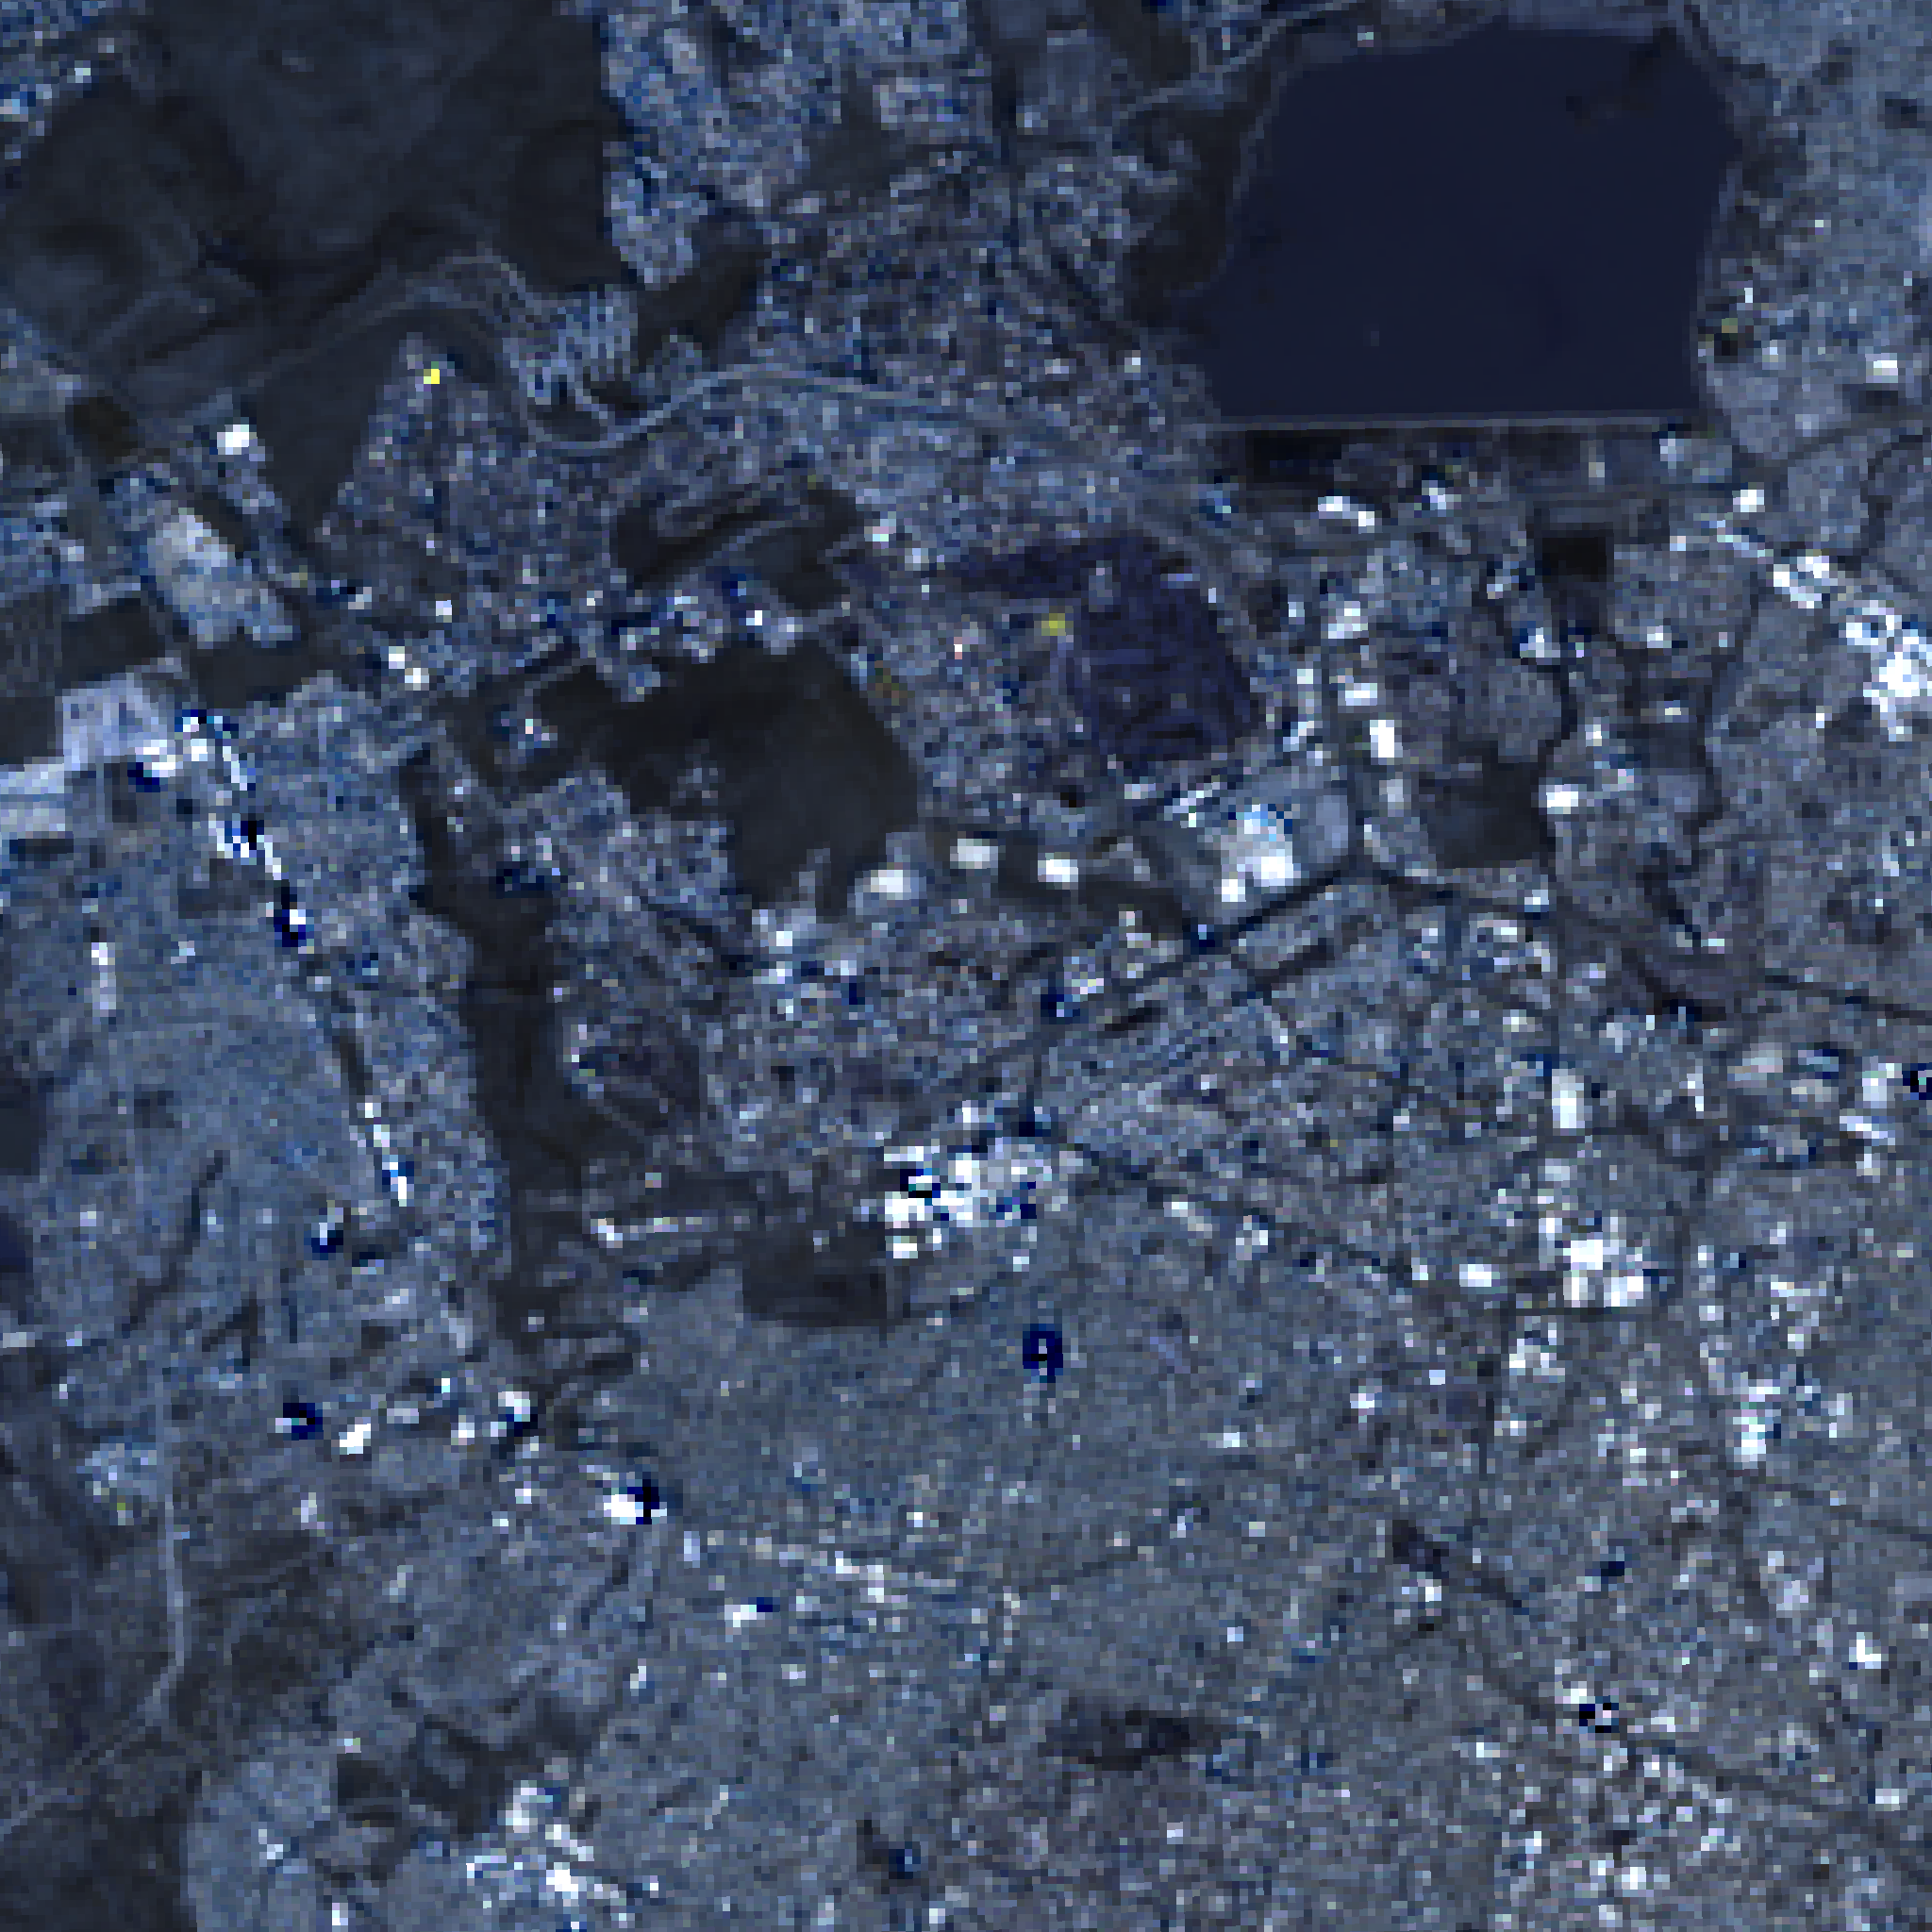

In [12]:
ima = Image.open(BytesIO(r4.content))
ima

### Wikipedia API
---

In [13]:
import requests
import pandas as pd

**Búsqueda por título**

In [14]:
title = 'Xoloitzcuintle'

url = f'https://en.wikipedia.org/w/api.php?action=query&format=json&titles={title}&prop=extracts'

request_wiki = requests.get(url)

request_wiki.status_code

200

In [15]:
request_wiki.json().keys()

dict_keys(['batchcomplete', 'warnings', 'query'])

In [16]:
request_wiki.json()['query'].keys()

dict_keys(['pages'])

In [17]:
request_wiki.json()['query']['pages'].keys()

dict_keys(['243549'])

In [18]:
request_wiki.json()['query']['pages']['243549'].keys()


dict_keys(['pageid', 'ns', 'title', 'extract'])

In [19]:
df = pd.json_normalize(request_wiki.json()['query']['pages']['243549'])
df

,pageid,ns,title,extract
0,243549,0,Xoloitzcuintle,<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzqui...


In [20]:
df = pd.json_normalize(request_wiki.json()['query'])
df['pages.243549.extract'][0]

'<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzquintle</b>, <b>Xoloitzcuintli</b>, or <b>Xolo</b>) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the <b>Perro pelón mexicano</b> or <b>Mexican hairless dog</b>. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is <i>xōlōitzcuintli</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷint͡ɬi]</span> (singular) and <i>xōlōitzcuintin</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷintin]</span> (plural). The name comes from the god <i>Xolotl</i

**Búsqueda por título**

In [21]:
buscar_titulo = 'Xoloitzcuintle'
 
endpoint = 'https://en.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'titles' : buscar_titulo, 
            'prop' : 'extracts'
        }

request2_wiki = requests.get(endpoint, params=params)

request2_wiki.status_code

200

In [22]:
df = pd.json_normalize(request2_wiki.json()['query'])
df['pages.243549.extract'][0]

'<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzquintle</b>, <b>Xoloitzcuintli</b>, or <b>Xolo</b>) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the <b>Perro pelón mexicano</b> or <b>Mexican hairless dog</b>. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is <i>xōlōitzcuintli</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷint͡ɬi]</span> (singular) and <i>xōlōitzcuintin</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷintin]</span> (plural). The name comes from the god <i>Xolotl</i

Restringir la búsqueda:

- exintro : solo el resumen
- exchars : número de caracteres
- exsentences : número de oraciones
- explaintext : texto plano (no HTML)

In [23]:
buscar_titulo = 'Xoloitzcuintle'
 
#endpoint = 'https://es.wikipedia.org/w/api.php'
endpoint = 'https://en.wikipedia.org/w/api.php'


params = {
            'action' : 'query',
            'format' : 'json',
            'titles' : buscar_titulo, 
            'prop' : 'extracts',
            'exintro': True,
            'explaintext': True
        }

request3_wiki = requests.get(endpoint, params=params)

request3_wiki.status_code

200

In [24]:

df = pd.json_normalize(request3_wiki.json()['query'])
resumen_xolo = df['pages.243549.extract'][0]
resumen_xolo

"The Xoloitzcuintle (or Xoloitzquintle, Xoloitzcuintli, or Xolo) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the Perro pelón mexicano or Mexican hairless dog. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is xōlōitzcuintli [ʃoːloːit͡sˈkʷint͡ɬi] (singular) and xōlōitzcuintin [ʃoːloːit͡sˈkʷintin] (plural). The name comes from the god Xolotl that, according to ancient narratives, is its creator and itzcuīntli [it͡sˈkʷiːnt͡ɬi], meaning 'dog' in the Nahuatl language.\n\n"

**Buscar por palabra en título**

In [25]:
buscar_en_titulo = 'Leon'
 
endpoint = 'https://es.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'list':'search',
            'srsearch' : buscar_en_titulo
        }

request4_wiki = requests.get(endpoint, params=params)

request4_wiki.status_code

200

In [26]:
data = pd.json_normalize(request4_wiki.json()['query']['search'])
data

,ns,title,pageid,size,wordcount,snippet,timestamp
0,0,LEON,766618,1824,161,"<span class=""searchmatch"">LEON</span> es un nú...",2022-12-13T14:18:14Z
1,0,Panthera leo,25116,146793,17903,"El <span class=""searchmatch"">león</span> (Pant...",2023-04-25T08:50:13Z
2,0,Léon,232172,31324,3716,"<span class=""searchmatch"">Léon</span>, también...",2023-03-04T18:05:25Z
3,0,León (España),3341,233782,25540,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-26T19:37:44Z
4,0,Castilla y León,485,194246,20428,"Castilla y <span class=""searchmatch"">León</spa...",2023-04-29T10:02:47Z
5,0,León (heráldica),1743552,18355,949,"En Heráldica el <span class=""searchmatch"">León...",2023-05-01T17:22:17Z
6,0,Nuevo León,25593,119632,9564,"Nuevo <span class=""searchmatch"">León</span> ( ...",2023-04-25T03:30:11Z
7,0,Provincia de León,23530,161746,16488,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-08T08:59:03Z
8,0,Reino de León,41339,32095,3709,"El reino de <span class=""searchmatch"">León</sp...",2023-04-27T03:14:13Z
9,0,León de Los Aldama,66887,162208,20499,"<span class=""searchmatch"">León</span> de los A...",2023-04-26T14:12:31Z


### REST API

In [27]:
buscar_en_titulo = 'León'
 
endpoint = 'https://es.wikipedia.org/w/rest.php/v1/search/title'

params = {
            'q' : buscar_en_titulo,
            'limit': 10
        }

request5_wiki = requests.get(endpoint, params=params)

request5_wiki.status_code

200

In [40]:
df = pd.json_normalize(request5_wiki.json()['pages'])
df

,id,key,title,excerpt,matched_title,description,thumbnail.mimetype,thumbnail.size,thumbnail.width,thumbnail.height,thumbnail.duration,thumbnail.url
0,25116,Panthera_leo,Panthera leo,León,León,mamífero carnívoro de la familia de los félidos,image/jpeg,None,60,45,None,//upload.wikimedia.org/wikipedia/commons/thumb...
1,3341,León_(España),León (España),León (España),None,"municipio de la provincia de León, España",image/svg+xml,None,60,40,None,//upload.wikimedia.org/wikipedia/commons/thumb...
2,50162,León_Trotski,León Trotski,León Trotski,None,político y revolucionario ucraniano,image/jpeg,None,60,81,None,//upload.wikimedia.org/wikipedia/commons/thumb...
3,66887,León_de_Los_Aldama,León de Los Aldama,León de Los Aldama,None,"Ciudad del estado de Guanajuato, México",image/jpeg,None,60,40,None,//upload.wikimedia.org/wikipedia/commons/thumb...
4,53084,León_Tolstói,León Tolstói,León Tolstói,None,escritor ruso,image/jpeg,None,60,83,None,//upload.wikimedia.org/wikipedia/commons/thumb...
5,16949,León_Febres-Cordero_Ribadeneyra,León Febres-Cordero Ribadeneyra,León Febres-Cordero Ribadeneyra,None,35° presidente de la República del Ecuador,image/jpeg,None,60,89,None,//upload.wikimedia.org/wikipedia/commons/thumb...
6,290529,León_de_Huánuco,León de Huánuco,León de Huánuco,None,club de fútbol peruano,image/png,None,60,78,None,//upload.wikimedia.org/wikipedia/commons/thumb...
7,53635,León_X,León X,León X,None,217° Papa de la Iglesia Católica,image/jpeg,None,60,85,None,//upload.wikimedia.org/wikipedia/commons/thumb...
8,4828940,León_Larregui,León Larregui,León Larregui,None,cantante y compositor mexicano,image/jpeg,None,60,55,None,//upload.wikimedia.org/wikipedia/commons/thumb...
9,53785,León_XIII,León XIII,León XIII,None,256.° papa de la Iglesia católica,image/jpeg,None,60,90,None,//upload.wikimedia.org/wikipedia/commons/thumb...


In [37]:
url = f'https://es.wikipedia.org/w/api.php?action=query&format=json&pageids={pages_list[0]}&prop=extracts&explaintext=True'
request_wiki = requests.get(url)
request_wiki.status_code
request_wiki.json()['query']['pages']

data = pd.json_normalize(request_wiki.json()['query']['pages'])
extract = data.iloc[:, 3][0]
extract

'El león (Panthera leo) es un mamífero carnívoro de la familia de los félidos y una de las cinco especies del género Panthera. Los leones salvajes viven en poblaciones cada vez más dispersas y fragmentadas del África subsahariana (a excepción de las regiones selváticas de la costa del Atlántico y la cuenca del Congo) y una pequeña zona del noroeste de India (una población en peligro crítico en el parque nacional del Bosque de Gir y alrededores), habiendo desaparecido del resto de Asia del Sur, Asia Occidental, África del Norte y la península balcánica en tiempos históricos. Hasta finales del Pleistoceno, hace aproximadamente diez mil años, de los grandes mamíferos terrestres, el león era el más extendido tras los humanos. Su distribución cubría la mayor parte de África, gran parte de Eurasia, desde el oeste de Europa hasta la India, y en América, desde el río Yukón hasta el sur de México.[3]\u200b[4]\u200b[5]\u200b\nSi sobreviven a las dificultades de la infancia, las leonas que viven 

In [44]:
titles_list = df['title'].to_list()
pages_list = df['id'].to_list()
extracts_list = []

for page in pages_list:
    url = f'https://es.wikipedia.org/w/api.php?action=query&format=json&pageids={page}&prop=extracts&explaintext=True&exintro=True,'
    request_wiki = requests.get(url)
    request_wiki.status_code
    request_wiki.json()['query']['pages']
    data = pd.json_normalize(request_wiki.json()['query']['pages'])
    extract = data.iloc[:, 3][0]
    extracts_list.append(extract)
    
for title, extract in zip(titles_list, extracts_list):
    print(f'{title} : {extract}')

Panthera leo : El león (Panthera leo) es un mamífero carnívoro de la familia de los félidos y una de las cinco especies del género Panthera. Los leones salvajes viven en poblaciones cada vez más dispersas y fragmentadas del África subsahariana (a excepción de las regiones selváticas de la costa del Atlántico y la cuenca del Congo) y una pequeña zona del noroeste de India (una población en peligro crítico en el parque nacional del Bosque de Gir y alrededores), habiendo desaparecido del resto de Asia del Sur, Asia Occidental, África del Norte y la península balcánica en tiempos históricos. Hasta finales del Pleistoceno, hace aproximadamente diez mil años, de los grandes mamíferos terrestres, el león era el más extendido tras los humanos. Su distribución cubría la mayor parte de África, gran parte de Eurasia, desde el oeste de Europa hasta la India, y en América, desde el río Yukón hasta el sur de México.[3]​[4]​[5]​
Si sobreviven a las dificultades de la infancia, las leonas que viven en

In [ ]:
request_wiki.json()['query']['pages']
df = pd.json_normalize(request_wiki.json()['query']['pages']).iloc[:, 3][0]

'León XIII is a district of the Tibás canton, in the San José province of Costa Rica.\n\n\n== History ==\nLeón XIII was created on 14 March 1994 by Ley 7377.\n\n\n== Geography ==\nLeón XIII has an area of 0.78 km² and an elevation of 1,094 metres.\n\n\n== Demographics ==\nFor the 2011 census, León XIII had a population of 13,661 inhabitants. \n\n\n== Transportation ==\n\n\n=== Road transportation ===\nThe district is covered by the following road routes:\n\n National Route 39\n\n\n== References =='